In [1]:
# Import necessary libraries and data (+handling)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Load the data
df = pd.read_csv("first_edit.csv", index_col=0)
df = df[['RT', 'intarray', 'mzarray']]
print(df.dtypes)

def convert_string_to_floats(s):
    numbers = s.strip('[]').split()
    return [float(num) for num in numbers]

try:
    df["intarray"] = df["intarray"].apply(convert_string_to_floats)
    df["mzarray"] = df["mzarray"].apply(convert_string_to_floats)
except:
    print(df.dtypes)

print(df.head())
print(df.dtypes)

# Placeholder function for extracting features (define this function as needed)
def extract_features(row):
    # Example feature extraction
    return pd.Series({
        'RT_mean': np.mean(row['RT']),
        'intensity_sum': np.sum(row['intarray']),
        'mz_mean': np.mean(row['mzarray']),
    })

# Extract features for each spectrum
features_df = df.apply(extract_features, axis=1)

# features_df contains the extracted features for each spectrum
print(features_df.head())

RT          float64
intarray     object
mzarray      object
dtype: object
           RT                                           intarray  \
0  2982.78870  [48871.57, 93090.67, 119617.8, 105596.12, 5844...   
1  2983.20168  [59790.492, 110884.73, 140389.9, 125135.02, 77...   
2  2984.01666  [46852.145, 96281.12, 124956.57, 108827.82, 62...   
3  2985.14556  [54953.508, 96425.24, 116641.32, 97879.38, 541...   
4  2987.20332  [60526.164, 89810.484, 101158.25, 86533.97, 50...   

                                             mzarray  
0  [548.65954386, 548.66259121, 548.66563859, 548...  
1  [548.61379491, 548.61684187, 548.61988887, 548...  
2  [548.61382113, 548.6168681, 548.6199151, 548.6...  
3  [548.61384751, 548.61689448, 548.61994148, 548...  
4  [548.61079121, 548.61383815, 548.61688512, 548...  
RT          float64
intarray     object
mzarray      object
dtype: object
      RT_mean  intensity_sum     mz_mean
0  2982.78870     425620.793  548.665639
1  2983.20168     545302.004  5

In [2]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter, find_peaks
from pyopenms import MSExperiment, MzMLFile


In [3]:
# Identify and Analyze Longest Lists

# Find the index of the entry with the longest 'intarray' list
index_of_longest_list = df["intarray"].apply(len).idxmax()
entry_with_longest_list = df.loc[index_of_longest_list]
print(entry_with_longest_list)
print(len(entry_with_longest_list["intarray"]))

# Get top x entries with the longest 'intarray' lists
x = 5
sorted_df = df.assign(list_length=df["intarray"].apply(len)).sort_values(by='list_length', ascending=False)
x_longest_lists = sorted_df.head(x)

print("Top", x, "entries with the longest lists:")
for index, row in x_longest_lists.iterrows():
    print("\nLength:", row['list_length'], "List:", row['intarray'])


RT                                                 3001.40106
intarray    [37131.742, 74389.18, 95209.844, 78137.508, 38...
mzarray     [548.5833512, 548.58639791, 548.58944466, 548....
Name: 20, dtype: object
22
Top 5 entries with the longest lists:

Length: 22 List: [44692.13, 95001.44, 135959.34, 134105.6, 86512.32, 28555.799, 80502.586, 134999.12, 158834.2, 134048.33, 81657.43, 37757.004, 250878.11, 686264.0, 598261.8, 864797.25, 1549659.5, 2219944.0, 2690697.2, 1960513.1, 1061445.0, 204630.77]

Length: 22 List: [37131.742, 74389.18, 95209.844, 78137.508, 38074.09, 37262.629, 204833.62, 686439.81, 1691707.1, 2793565.2, 3350089.8, 2476750.8, 1416599.6, 484392.56, 127039.37, 1143.0114, 35405.695, 78728.938, 125980.58, 148989.97, 126890.64, 72447.227]

Length: 19 List: [85316.53, 146718.88, 183843.47, 174275.17, 122102.7, 61326.15, 77526.38, 138158.22, 191254.77, 194644.0, 135625.67, 66543.87, 65666.94, 168720.25, 539716.5, 665356.5, 466801.9, 237027.0, 6179.7534]

Length: 18 List: [4

In [4]:
# Filter Data Based on m/z Range

# Define m/z range for filtering
lower_bound = 548.59
upper_bound = 548.65

# Function to check if all values in 'mzarray' are within the specified range
def is_in_range(array):
    return all(lower_bound <= value <= upper_bound for value in array)

# Filter DataFrame based on m/z range
filtered_df = df[df["mzarray"].apply(is_in_range)]

print("Filtered DataFrame:")
print(filtered_df)

Filtered DataFrame:
             RT                                           intarray  \
1    2983.20168  [59790.492, 110884.73, 140389.9, 125135.02, 77...   
2    2984.01666  [46852.145, 96281.12, 124956.57, 108827.82, 62...   
3    2985.14556  [54953.508, 96425.24, 116641.32, 97879.38, 541...   
4    2987.20332  [60526.164, 89810.484, 101158.25, 86533.97, 50...   
5    2988.44046  [64843.98, 109844.74, 133836.3, 117433.62, 715...   
..          ...                                                ...   
154  3106.95678  [85941.21, 168822.23, 232468.89, 108135.375, 4...   
155  3107.36892  [9629.915, 133756.48, 274035.0, 409317.16, 389...   
156  3108.69192  [15997.058, 42802.723, 104968.83, 170648.17, 1...   
157  3109.65018  [44341.453, 56981.758, 62409.152, 54096.324, 3...   
160  3112.43544  [27647.984, 61139.816, 94678.586, 106869.984, ...   

                                               mzarray  
1    [548.61379491, 548.61684187, 548.61988887, 548...  
2    [548.61382113, 548.6

In [5]:
# Determine Peaks and Iterations

# Function to find step lengths between peaks
def find_step_length(df):
    max_intensity = float("-inf")
    iterations_needed = 0
    it_list = []
    
    for index, row in df.iterrows():
        iterations_needed += 1
        max_in_entry = max(row["intarray"])
        
        if max_in_entry > max_intensity:
            max_intensity = max_in_entry
            it_list.append(iterations_needed)
            iterations_needed = 0

    highest_values = sorted(it_list, reverse=True)[:2]
    sugg_thresh = highest_values[0] - highest_values[1]
    return sugg_thresh

# Determine threshold for step length
threshhold = find_step_length(filtered_df)
print(threshhold)

# Function to find maxima in the data
def find_maxima(df, max_iter):
    max_intensity = float("-inf")
    iterations_needed = 0
    possible_ends = {}

    for index, row in df.iterrows():
        iterations_needed += 1
        if iterations_needed >= max_iter:
            print("Possible end of Peak.", iterations_needed)
            iterations_needed = 0
            possible_ends[index] = list(df["intarray"].loc[index])
            if len(possible_ends) >= 3:
                print("3rd possible end. Break.")
                print(possible_ends)
                return [possible_ends, 0]
        else:
            max_in_entry = max(row["intarray"])
            if max_in_entry > max_intensity:
                max_intensity = max_in_entry
                print("New max intensity found:", max_in_entry)
                print("Iterations needed to find it:", iterations_needed)
                print("At RT value:", df["RT"].loc[index])
                iterations_needed = 0

    return [possible_ends, 1]

# Function to determine peaks using maxima and threshold
def determine_peaks(df, thresh, max_iterations):
    possible_ends = find_maxima(df, max_iterations)
    if possible_ends[1] == 0:
        print("Second Function")
        pass

determine_peaks(filtered_df, threshhold, 6)


10
New max intensity found: 140389.9
Iterations needed to find it: 1
At RT value: 2983.20168
New max intensity found: 375303.97
Iterations needed to find it: 5
At RT value: 2989.49304
New max intensity found: 487661.25
Iterations needed to find it: 1
At RT value: 2991.67482
Possible end of Peak. 6
New max intensity found: 2011680.0
Iterations needed to find it: 1
At RT value: 2998.05858
New max intensity found: 2523866.2
Iterations needed to find it: 3
At RT value: 3000.58968
New max intensity found: 3841891.5
Iterations needed to find it: 2
At RT value: 3002.63046
New max intensity found: 4062394.8
Iterations needed to find it: 1
At RT value: 3003.43434
New max intensity found: 5420216.5
Iterations needed to find it: 2
At RT value: 3005.38872
New max intensity found: 7194787.0
Iterations needed to find it: 2
At RT value: 3006.77148
New max intensity found: 7863673.5
Iterations needed to find it: 2
At RT value: 3007.75758
New max intensity found: 8065292.5
Iterations needed to find it:

[548.61071816, 548.6137651, 548.61681207, 548.61985906, 548.62290608, 548.62595313, 548.6290002]
[49395.35, 114050.28, 293136.97, 372476.78, 294646.0, 176631.58, 59590.383]


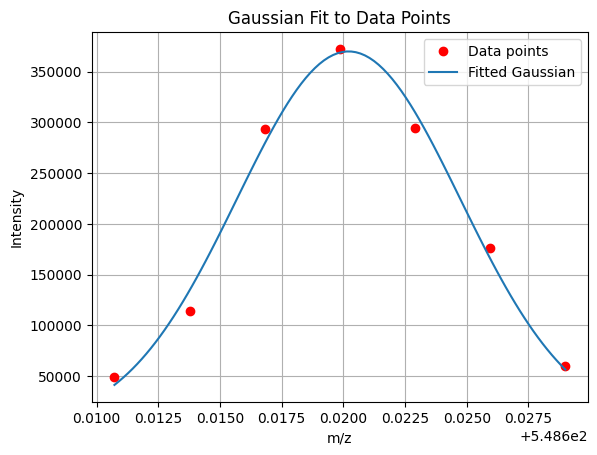

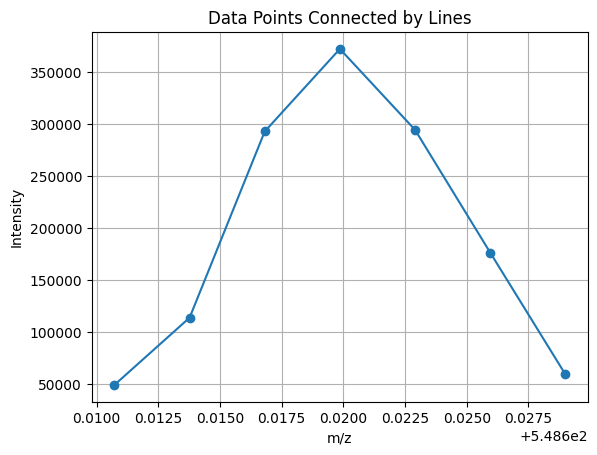

In [6]:
# Gaussian Curve Fitting

# Select data for fitting
x_data = df["mzarray"].loc[10]
y_data = df["intarray"].loc[10]
print(x_data)
print(y_data)

# Define Gaussian function
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev) ** 2 / 2)

# Calculate initial guess for parameters
amplitude_guess = max(y_data) - min(y_data)
mean_guess = np.mean(x_data)
stddev_guess = np.std(x_data)

# Fit Gaussian curve to data
popt, _ = curve_fit(gaussian, x_data, y_data, p0=[amplitude_guess, mean_guess, stddev_guess])

# Generate points on the fitted curve
x_curve = np.linspace(min(x_data), max(x_data), 100)
y_curve = gaussian(x_curve, *popt)

# Plot original data and fitted Gaussian curve
plt.plot(x_data, y_data, 'ro', label='Data points')
plt.plot(x_curve, y_curve, label='Fitted Gaussian')
plt.title('Gaussian Fit to Data Points')
plt.xlabel('m/z')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True)
plt.show()

# Plot original data connected by lines
plt.plot(x_data, y_data, marker='o', linestyle='-')
plt.title('Data Points Connected by Lines')
plt.xlabel('m/z')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()


In [7]:
# Big Gaussian Peak Analysis

# Function to create a big Gaussian peak from data
def big_gaussian(input_range):
    rt = []
    max_intensities = []
    min_intensities = []
    mean_intensities = []
    p1_intensities = []     
    p2_intensities = []

    for rt_val, row_int in zip(df["RT"][:input_range], df["intarray"][:input_range]):
        max_int = max(row_int)
        min_int = min(row_int)
        mean_int = np.mean(row_int)
        p1 = np.percentile(row_int, 10)
        p2 = np.percentile(row_int, 20)

        max_intensities.append(max_int)
        min_intensities.append(min_int)
        mean_intensities.append(mean_int)
        p1_intensities.append(p1)
        p2_intensities.append(p2)
        rt.append(rt_val)

    return np.array(rt), np.array(max_intensities), np.array(min_intensities), np.array(mean_intensities), np.array(p1_intensities), np.array(p2_intensities)

# Generate big Gaussian peak data
rt_x, max_int_y, min_int_y, mean_int_y, p1_int_y, p2_int_y = big_gaussian(None)

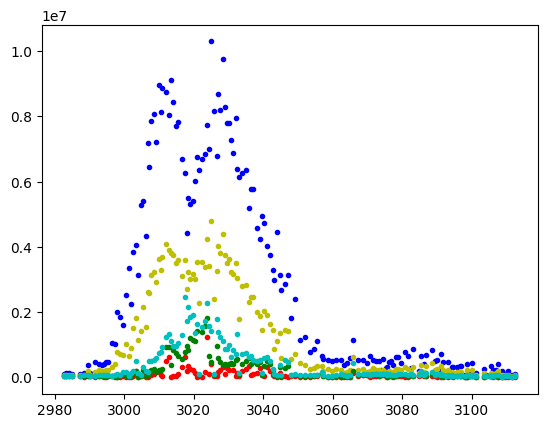

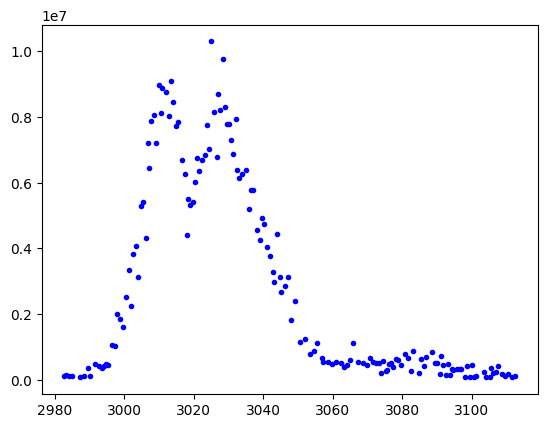

In [8]:
# Remove Outliers Using IQR

# Function to remove outliers using IQR
def remove_outliers_iqr(arr):
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    mask = (arr >= lower_bound) & (arr <= upper_bound)
    return arr[mask], np.arange(len(arr))[mask]

# Apply IQR rule to remove outliers
filtered_x, f_idx = remove_outliers_iqr(rt_x)

max_filtered_y = max_int_y[f_idx]
min_filtered_y = min_int_y[f_idx]
mean_filtered_y = mean_int_y[f_idx]
p1_filtered_y = p1_int_y[f_idx]
p2_filtered_y = p2_int_y[f_idx]

# Plot filtered data
plt.scatter(filtered_x, max_filtered_y, marker=".", color="b")
plt.scatter(filtered_x, min_filtered_y, marker=".", color="r")
plt.scatter(filtered_x, mean_filtered_y, marker=".", color="y")
plt.scatter(filtered_x, p1_filtered_y, marker=".", color="g")
plt.scatter(filtered_x, p2_filtered_y, marker=".", color="c")
plt.show()

plt.scatter(filtered_x, max_filtered_y, marker=".", color="b")
plt.show()


Behavior of different percentiles of the peak could show whether they can be split here and there. Especially in the lower parts of the curve.

When the peak curve behavior and the lower percentiles behaviors diverge.

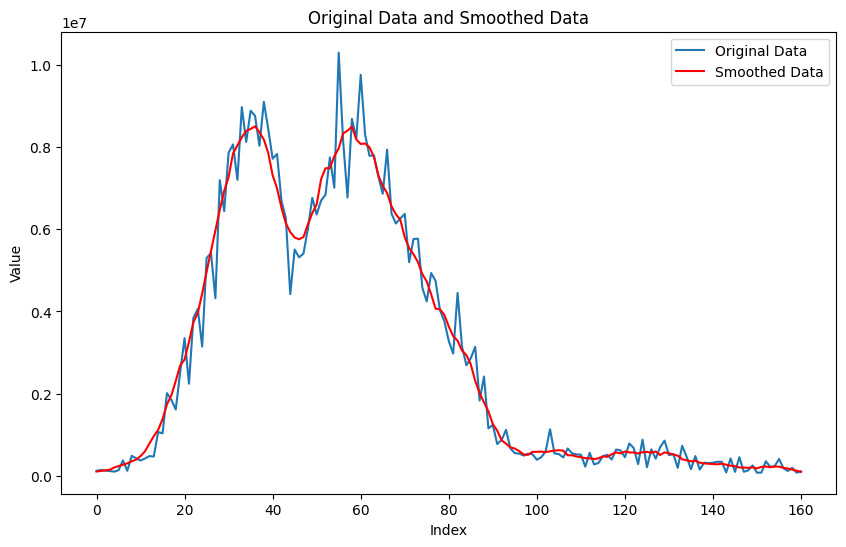

In [9]:
# Apply Savitzky-Golay Filter

# Define data for smoothing
x = np.arange(len(max_filtered_y))
y = np.array(max_filtered_y)

# Apply Savitzky-Golay filtering
smoothed_mfy = savgol_filter(y, window_length=8, polyorder=1)

# Plot original data and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Data')
plt.plot(x, smoothed_mfy, color='red', label='Smoothed Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Original Data and Smoothed Data')
plt.legend()
plt.show()


In [10]:
# Find Local Maxima and Minima

# Find local maxima
local_max_indices, _ = find_peaks(smoothed_mfy)
local_max_values = [smoothed_mfy[i] for i in local_max_indices]

# Find local minima by inverting the data
inverted_data = [-x for x in smoothed_mfy]
local_min_indices, _ = find_peaks(inverted_data)
local_min_values = [-smoothed_mfy[i] for i in local_min_indices]

print("Local Maxima Indices:", local_max_indices)
print("Local Maxima Values:", local_max_values)

print("Local Minima Indices:", local_min_indices)
print("Local Minima Values:", local_min_values)

# Identify significant minima based on heuristic
significant_min = []
threshold = 0.2
window = 10

for idx_min in local_min_indices:
    fails = 0
    for entry in smoothed_mfy[idx_min - window:idx_min]:
        if entry < smoothed_mfy[idx_min]:
            fails += 1
        else:
            continue
    
    if fails == 0:
        significant_min.append(idx_min)
        print("Significant Minima | IDX:", idx_min)
    else:
        print("Fails:", fails)

print("Significant Minima:", significant_min)

# Example of analyzing a significant minimum
significant_minimum_idx = 46
print(max_filtered_y[46])
print(rt_x[46])

Local Maxima Indices: [ 36  58  61 101 105 108 115 118 120 122 125 127 129 136 142 149 152 154]
Local Maxima Values: [8506446.999999998, 8497913.25, 8088199.937499999, 588057.1112499998, 622520.2599999998, 500720.22, 474346.77749999997, 569545.7975, 591723.2437499999, 568771.095, 582276.9299999998, 591481.2187499999, 570971.3849999999, 366610.54375, 295025.6699999999, 207604.94187499996, 225559.76874999996, 223610.18799999997]
Local Minima Indices: [ 46  60  98 102 107 113 116 119 121 123 126 128 135 141 148 150 153]
Local Minima Values: [-5757966.125, -8076921.8125, -510121.82374999986, -576816.3287499999, -498579.5824999999, -408962.08249999996, -460605.94499999995, -545594.41875, -568094.5562499999, -543197.5799999998, -560801.4362499998, -505642.2012499999, -351093.27625, -278406.33999999997, -192180.59187499995, -180062.635625, -208878.22049999997]
Significant Minima | IDX: 46
Fails: 6
Significant Minima | IDX: 98
Fails: 2
Significant Minima | IDX: 107
Significant Minima | IDX: 11

# New Part

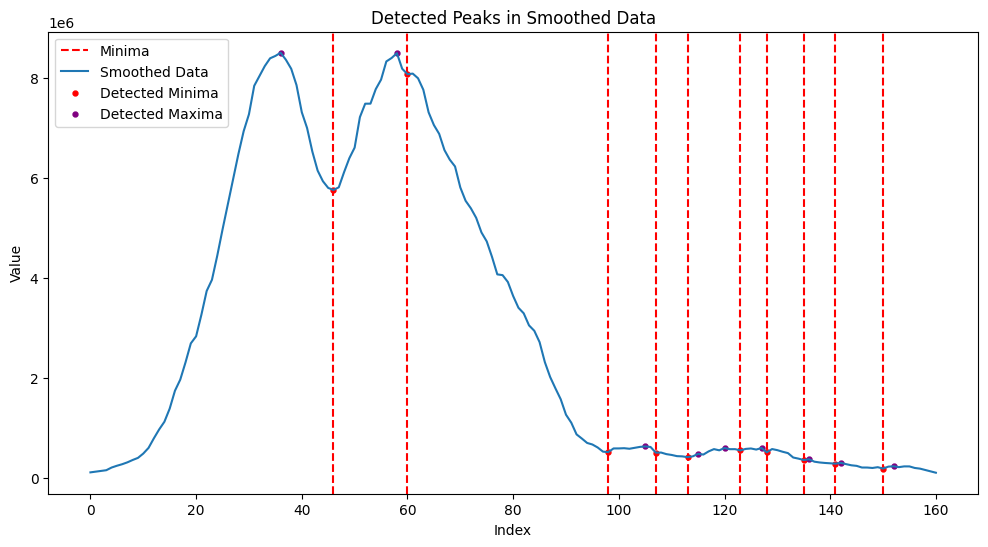

In [11]:
# Import necessary library
from scipy.signal import find_peaks

# Detect peaks (maxima) in the smoothed data
peaks, properties = find_peaks(smoothed_mfy, height=None, threshold=None, distance=5, prominence=0.1)
# Detect minima by inverting the smoothed data and finding peaks
inverted_data = -smoothed_mfy
minima, _ = find_peaks(inverted_data, height=None, threshold=None, distance=5, prominence=0.1)

# Function to plot the detected peaks and minima
def plot_peaks(data, minima, maxima):
    plt.figure(figsize=(12, 6))
    for m in minima:
        plt.axvline(x=m, color='r', linestyle='--', label='Minima' if m == minima[0] else "")
    plt.plot(data, label='Smoothed Data')
    plt.scatter(minima, data[minima], color='red', s=50, marker='.', label='Detected Minima')
    plt.scatter(maxima, data[maxima], color='purple', s=50, marker='.', label='Detected Maxima')
    plt.title('Detected Peaks in Smoothed Data')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Plot the detected peaks and minima
plot_peaks(smoothed_mfy, minima, peaks)

In [12]:
# Calculate percentage changes between consecutive minima
changes_in_minima = []
for i in range(1, len(minima)):
    change = round((smoothed_mfy[minima[i]] - smoothed_mfy[minima[i - 1]]) / smoothed_mfy[minima[i - 1]] * 100, 2)
    changes_in_minima.append(change)

# Output the list of changes for minima
print("Minima", minima)
print("Change", changes_in_minima)

# Create a DataFrame for minima and their changes
minima_df = pd.DataFrame()
minima_df["Minima IDX"] = minima
minima_df["Change FW"] = changes_in_minima + ["Nan"]
minima_df['Intensity'] = minima_df['Minima IDX'].apply(lambda x: smoothed_mfy[x])
minima_df


Minima [ 46  60  98 107 113 123 128 135 141 150]
Change [40.27, -93.68, -2.26, -17.97, 32.82, -6.91, -30.56, -20.7, -35.32]


,Minima IDX,Change FW,Intensity
0,46,40.27,5.757966e+06
1,60,-93.68,8.076922e+06
2,98,-2.26,5.101218e+05
3,107,-17.97,4.985796e+05
4,113,32.82,4.089621e+05
5,123,-6.91,5.431976e+05
6,128,-30.56,5.056422e+05
7,135,-20.7,3.510933e+05
8,141,-35.32,2.784063e+05
9,150,Nan,1.800626e+05


In [13]:
# Calculate percentage changes between consecutive maxima
changes_in_maxima = []
for i in range(1, len(peaks)):
    change = round((smoothed_mfy[peaks[i]] - smoothed_mfy[peaks[i - 1]]) / smoothed_mfy[peaks[i - 1]] * 100, 2)
    changes_in_maxima.append(change)

# Output the list of changes for maxima
print("Maxima", peaks)
print("Change", changes_in_maxima)

# Create a DataFrame for maxima and their changes
maxima_df = pd.DataFrame()
maxima_df["Maxima IDX"] = peaks
maxima_df["Change FW"] = changes_in_maxima + ["Nan"]
maxima_df['Intensity'] = maxima_df['Maxima IDX'].apply(lambda x: smoothed_mfy[x])
maxima_df


Maxima [ 36  58 105 115 120 127 136 142 152]
Change [-0.1, -92.67, -23.8, 24.74, -0.04, -38.02, -19.53, -23.55]


,Maxima IDX,Change FW,Intensity
0,36,-0.1,8.506447e+06
1,58,-92.67,8.497913e+06
2,105,-23.8,6.225203e+05
3,115,24.74,4.743468e+05
4,120,-0.04,5.917232e+05
5,127,-38.02,5.914812e+05
6,136,-19.53,3.666105e+05
7,142,-23.55,2.950257e+05
8,152,Nan,2.255598e+05


In [14]:
# Add type labels to the DataFrames
maxima_df['Type'] = 'Max'
minima_df['Type'] = 'Min'

# Rename index columns to a common name for easier concatenation
maxima_df.rename(columns={'Maxima IDX': 'Index'}, inplace=True)
minima_df.rename(columns={'Minima IDX': 'Index'}, inplace=True)

# Concatenate the DataFrames
combined_df = pd.concat([maxima_df, minima_df])

# Reset the index if you want to clean up the index after concatenation
combined_df.reset_index(drop=True, inplace=True)

# Optionally, sort by the 'Index' column if you want them in order
combined_df.sort_values('Index', inplace=True)

# Display the combined DataFrame
print(combined_df)


    Index Change FW     Intensity Type
0      36      -0.1  8.506447e+06  Max
9      46     40.27  5.757966e+06  Min
1      58    -92.67  8.497913e+06  Max
10     60    -93.68  8.076922e+06  Min
11     98     -2.26  5.101218e+05  Min
2     105     -23.8  6.225203e+05  Max
12    107    -17.97  4.985796e+05  Min
13    113     32.82  4.089621e+05  Min
3     115     24.74  4.743468e+05  Max
4     120     -0.04  5.917232e+05  Max
14    123     -6.91  5.431976e+05  Min
5     127    -38.02  5.914812e+05  Max
15    128    -30.56  5.056422e+05  Min
16    135     -20.7  3.510933e+05  Min
6     136    -19.53  3.666105e+05  Max
17    141    -35.32  2.784063e+05  Min
7     142    -23.55  2.950257e+05  Max
18    150       Nan  1.800626e+05  Min
8     152       Nan  2.255598e+05  Max


In [15]:
# Calculate the previous intensity for each row
combined_df['Previous Intensity'] = combined_df['Intensity'].shift(1)

# Calculate the percentage change from one row to the next
combined_df['Percentage Change'] = ((combined_df['Intensity'] - combined_df['Previous Intensity']) / combined_df['Previous Intensity']) * 100

# Cleaning up the first row's change since it will be NaN because there's no previous row
combined_df['Percentage Change'].iloc[0] = np.nan

# Optionally, define the direction of change
combined_df['Change Direction'] = np.where(combined_df['Type'] != combined_df['Type'].shift(1), combined_df['Type'].shift(1) + " to " + combined_df['Type'], np.nan)

# Show results
print(combined_df[['Index', 'Change FW', 'Intensity', 'Type', 'Previous Intensity', 'Percentage Change', 'Change Direction']])

    Index Change FW     Intensity Type  Previous Intensity  Percentage Change  \
0      36      -0.1  8.506447e+06  Max                 NaN                NaN   
9      46     40.27  5.757966e+06  Min        8.506447e+06         -32.310563   
1      58    -92.67  8.497913e+06  Max        5.757966e+06          47.585329   
10     60    -93.68  8.076922e+06  Min        8.497913e+06          -4.954057   
11     98     -2.26  5.101218e+05  Min        8.076922e+06         -93.684205   
2     105     -23.8  6.225203e+05  Max        5.101218e+05          22.033646   
12    107    -17.97  4.985796e+05  Min        6.225203e+05         -19.909501   
13    113     32.82  4.089621e+05  Min        4.985796e+05         -17.974563   
3     115     24.74  4.743468e+05  Max        4.089621e+05          15.987960   
4     120     -0.04  5.917232e+05  Max        4.743468e+05          24.744864   
14    123     -6.91  5.431976e+05  Min        5.917232e+05          -8.200736   
5     127    -38.02  5.91481

C:\Users\victo\AppData\Local\Temp\ipykernel_10440\2871291964.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Percentage Change'].iloc[0] = np.nan


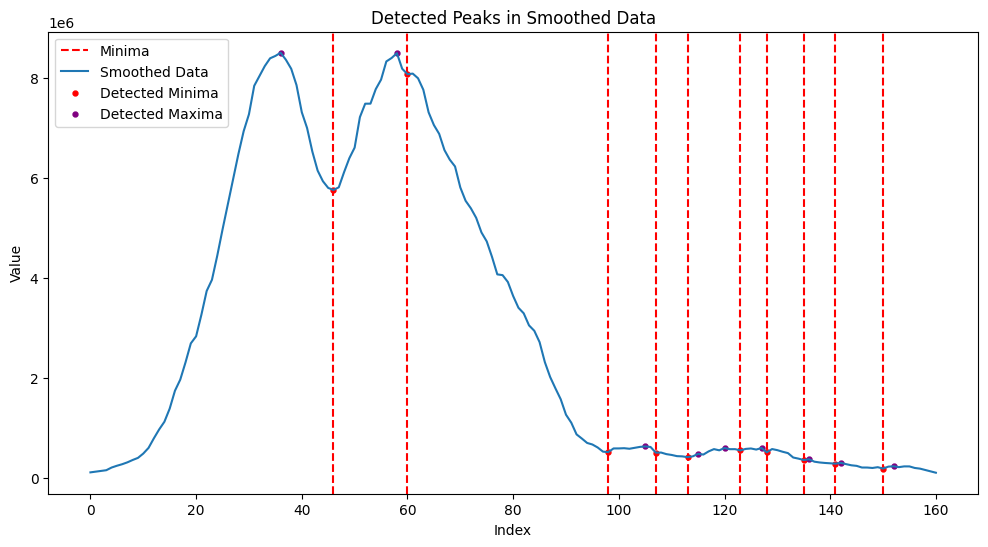

In [16]:
# Plot the detected peaks and minima
plot_peaks(smoothed_mfy, minima, peaks)

Slope between first minima and first maxima: 265860.8538104839


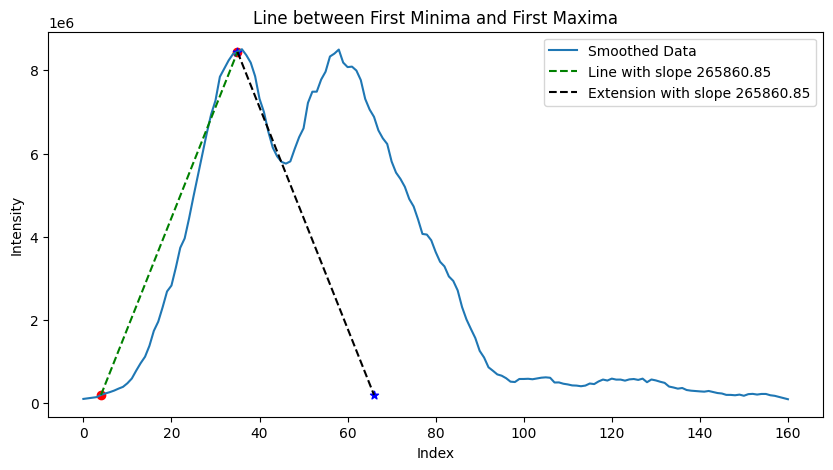

In [17]:
# Exploration code

# Example minima and maxima indices
minima = np.array([4, 46, 96, 103, 111, 120, 127, 141, 146])
peaks = np.array([35, 58, 97, 104, 114, 123, 128, 138, 145, 151])

# Extracting the coordinates for the first minima and maxima
first_minima_index = minima[0]
first_maxima_index = peaks[0]
x1, y1 = x[first_minima_index], smoothed_mfy[first_minima_index]
x2, y2 = x[first_maxima_index], smoothed_mfy[first_maxima_index]

# Calculate the slope between the first minima and the first maxima
slope = (y2 - y1) / (x2 - x1)
print("Slope between first minima and first maxima:", slope)

# Plotting the relationship between minima and maxima
plt.figure(figsize=(10, 5))
plt.plot(x, smoothed_mfy, label='Smoothed Data')
plt.scatter([x1, x2], [y1, y2], color='red')  # Highlight the minima and maxima
plt.plot([x1, x2], [y1, y2], 'g--', label=f'Line with slope {slope:.2f}')
plt.plot([x2, x2 + (x2 - x1)], [y2, y2 - (y2 - y1)], 'k--', label=f'Extension with slope {slope:.2f}')
plt.scatter([x2, x2 + (x2 - x1)], [y2, y2 - (y2 - y1)], color='b', marker="*")  # Highlight predicted end of peak

plt.legend()
plt.xlabel('Index')
plt.ylabel('Intensity')
plt.title('Line between First Minima and First Maxima')
plt.show()

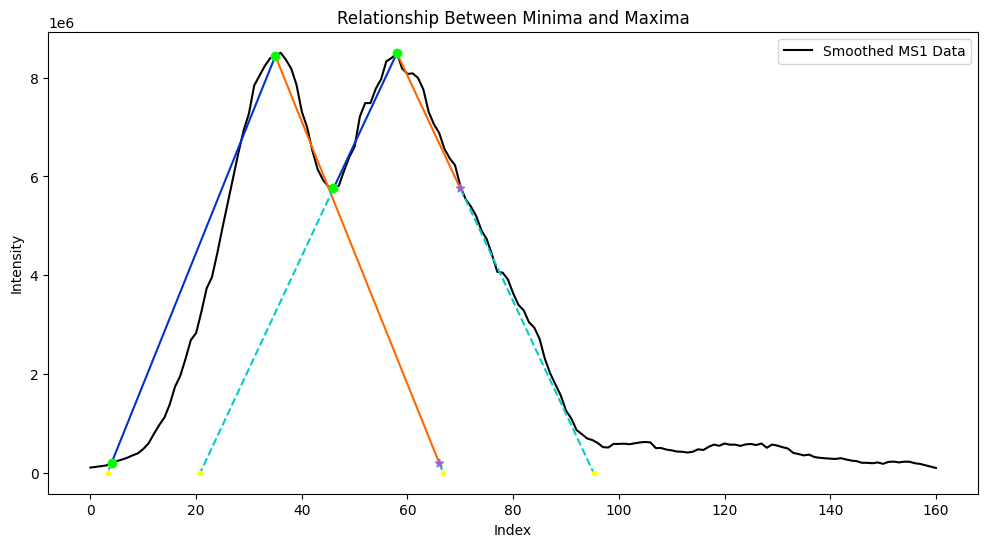

In [18]:
# Function to draw lines and extend to the baseline
def connect_2(x1, x2, y1, y2):
    slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else 0
    plt.plot([x1, x2], [y1, y2], '#0033CC')
    plt.scatter([x1, x2], [y1, y2], zorder=3, color="#00FF00")

    extension_x = x2 + (x2 - x1)
    extension_y = y2 - (y2 - y1)
    plt.plot([x2, extension_x], [y2, extension_y], '#FF6600')
    plt.scatter([extension_x], [extension_y], color='#9966CC', marker="*", zorder=4)

    if slope != 0:
        x_intersect = x2 - (y2 / slope)
        plt.plot([x1, x_intersect], [y1, 0], "#00CCCC", linestyle="--")
        plt.scatter([x_intersect], [0], color="#FFFF00", marker=".", zorder=4)

        x_intersect2 = x2 + (-y2 / -slope)
        plt.plot([extension_x, x_intersect2], [extension_y, 0], '#00CCCC', linestyle="--")
        plt.scatter([x_intersect2], [0], color="#FFFF00", marker=".", zorder=4)

plt.figure(figsize=(12, 6))
plt.plot(x, smoothed_mfy, color="k", label='Smoothed MS1 Data')

for min_idx, max_idx in zip(minima[:2], peaks[:2]):
    try:
        x1, y1 = x[min_idx], smoothed_mfy[min_idx]
        x2, y2 = x[max_idx], smoothed_mfy[max_idx]
        connect_2(x1, x2, y1, y2)
    except Exception as e:
        print(f"Error processing pair {min_idx}, {max_idx}: {e}")

plt.xlabel('Index')
plt.ylabel('Intensity')
plt.title('Relationship Between Minima and Maxima')
plt.legend()
plt.show()

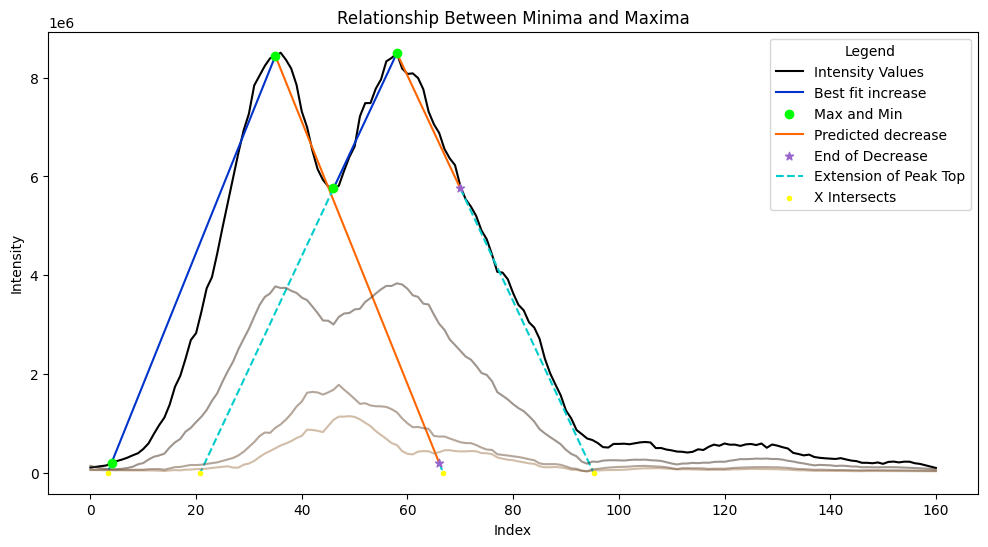

In [19]:
# Smooth additional intensity data using Savitzky-Golay filter
mean_fy = savgol_filter(mean_filtered_y, window_length=18, polyorder=2)
p1_fy = savgol_filter(p1_filtered_y, window_length=18, polyorder=2)
p2_fy = savgol_filter(p2_filtered_y, window_length=18, polyorder=2)

plt.figure(figsize=(12, 6))
plt.plot(x, smoothed_mfy, "#000000", label='Smoothed MS1 Data')

for min_idx, max_idx in zip(minima[:2], peaks[:2]):
    try:
        x1, y1 = x[min_idx], smoothed_mfy[min_idx]
        x2, y2 = x[max_idx], smoothed_mfy[max_idx]
        connect_2(x1, x2, y1, y2)
    except Exception as e:
        print(f"Error processing pair {min_idx}, {max_idx}: {e}")

plt.plot(x, mean_fy, color="#3E2C1F", alpha=0.5)
plt.plot(x, p1_fy, color="#A67C52", alpha=0.5)
plt.plot(x, p2_fy, color="#6B4E37", alpha=0.5)

plt.xlabel('Index')
plt.ylabel('Intensity')
plt.title('Relationship Between Minima and Maxima')
plt.legend(title='Legend', labels=[
    "Intensity Values", 
    "Best fit increase", 
    "Max and Min", 
    "Predicted decrease", 
    "End of Decrease", 
    "Extension of Peak Top", 
    "X Intersects"], loc='best')
plt.show()


## Geometric Analysis of Peaks

In [20]:
# Import necessary libraries
import math
import matplotlib.patches as patches

# Function to calculate the distance between two points
def distance_between_points(point1, point2):
    x1, y1 = float(point1[0]), float(point1[1])
    x2, y2 = float(point2[0]), float(point2[1])
    
    # Calculate the differences in coordinates
    dx = x2 - x1
    dy = y2 - y1
    
    # Calculate the distance using the formula
    distance = math.sqrt(dx**2 + dy**2)
    return distance

# Function to calculate the area of a triangle given three points
def area_triangle(A, B, C):
    # Calculate the base as the distance between points A and C
    base = distance_between_points(A, C)

    # Calculate the perpendicular height from B to line AC
    x1, y1 = A
    x2, y2 = B
    x3, y3 = C
    numerator = abs((y3-y1)*x2 - (x3-x1)*y2 + x3*y1 - y3*x1)
    denominator = math.sqrt((y3-y1)**2 + (x3-x1)**2)
    height = numerator / denominator

    # Calculate the area using the base and the height
    area = 0.5 * base * height
    return area

# Calculate areas of triangles formed by minima and maxima
for min_idx, max_idx in zip(minima[:2], peaks[:2]):
    try:
        x1, y1 = x[min_idx], smoothed_mfy[min_idx]
        x2, y2 = x[max_idx], smoothed_mfy[max_idx]
    except IndexError:
        continue
    
    A = [x1, y1]
    B = [x2, y2]
    slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else 0
    C = [x2 + (-y2 / -slope), 0]
    area = area_triangle(A, B, C)
    print(area)

print(peaks)
print(smoothed_mfy[35])

261701682.25
101974958.99999994
[ 35  58  97 104 114 123 128 138 145 151]
8441989.75


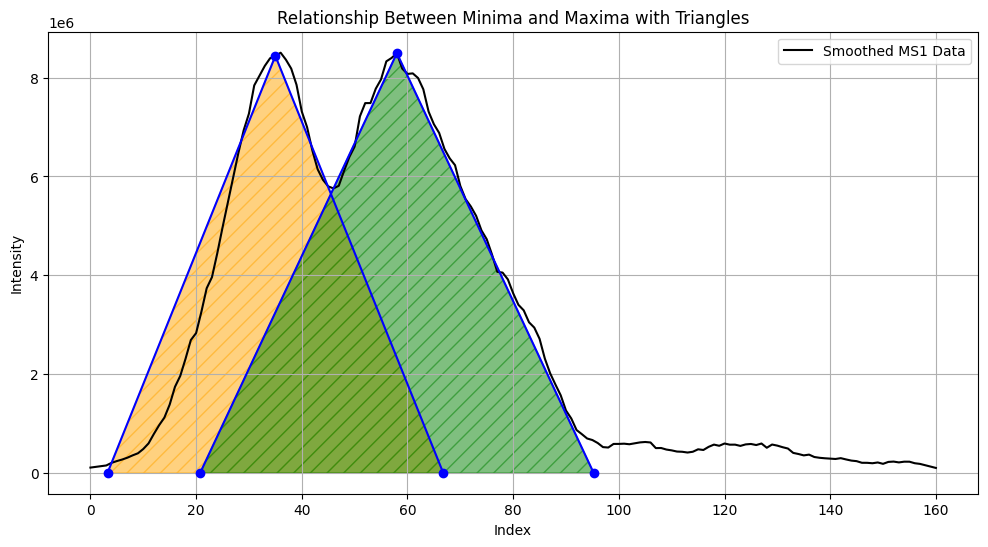

In [21]:
# Plot triangles formed by minima and maxima
plt.figure(figsize=(12, 6))
plt.plot(x, smoothed_mfy, "#000000", label='Smoothed MS1 Data')

ax = plt.gca()

for min_idx, max_idx in zip(minima[:2], peaks[:2]):
    try:
        x1, y1 = x[min_idx], smoothed_mfy[min_idx]
        x2, y2 = x[max_idx], smoothed_mfy[max_idx]
        slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else 0
    except IndexError:
        continue
    
    # Calculate intersections for triangle vertices
    x_intersect = x2 - (y2 / slope)
    x_intersect2 = x2 + (-y2 / -slope)
    
    x_triangle = [x_intersect, x2, x_intersect2]
    y_triangle = [0, y2, 0]
    
    plt.plot(x_triangle, y_triangle, 'bo-')
    if min_idx == minima[0]:
        plt.fill(x_triangle, y_triangle, color='orange', alpha=0.5, hatch="//")
    else:
        plt.fill(x_triangle, y_triangle, color='green', alpha=0.5, hatch="//")

plt.xlabel('Index')
plt.ylabel('Intensity')
plt.title('Relationship Between Minima and Maxima with Triangles')
plt.legend()
plt.grid(True)
plt.show()

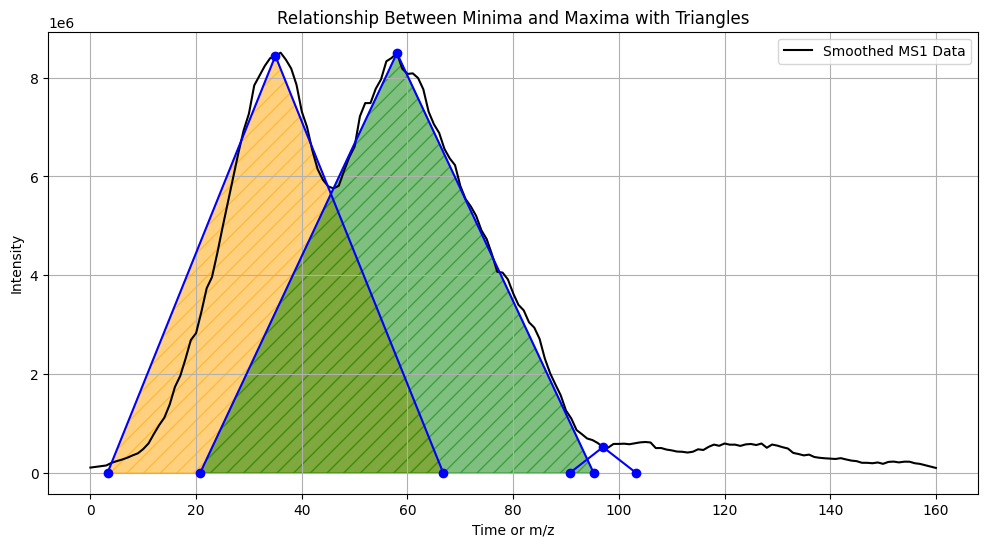

In [22]:
# Plot with extended lines and areas
plt.figure(figsize=(12, 6))
plt.plot(x, smoothed_mfy, "#000000", label='Smoothed MS1 Data')

for min_idx, max_idx in zip(minima[:3], peaks[:3]):
    try:
        x1, y1 = x[min_idx], smoothed_mfy[min_idx]
        x2, y2 = x[max_idx], smoothed_mfy[max_idx]
        slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else 0
        post_min_idx = np.where(minima == min_idx)[0][0] + 1
        x_intersect = x2 - (y2 / slope)
        x_intersect2 = x2 + (-y2 / -slope)
        x_triangle = [x_intersect, x2, x_intersect2]
        y_triangle = [0, y2, 0]
        
        plt.plot(x_triangle, y_triangle, 'bo-')
    except IndexError:
        continue
    
    if min_idx == minima[0]:
        plt.fill(x_triangle, y_triangle, color='orange', alpha=0.5, hatch="//")
    elif min_idx == minima[1]:
        plt.fill(x_triangle, y_triangle, color='green', alpha=0.5, hatch="//")

plt.xlabel('Time or m/z')
plt.ylabel('Intensity')
plt.title('Relationship Between Minima and Maxima with Triangles')
plt.legend()
plt.grid(True)
plt.show()


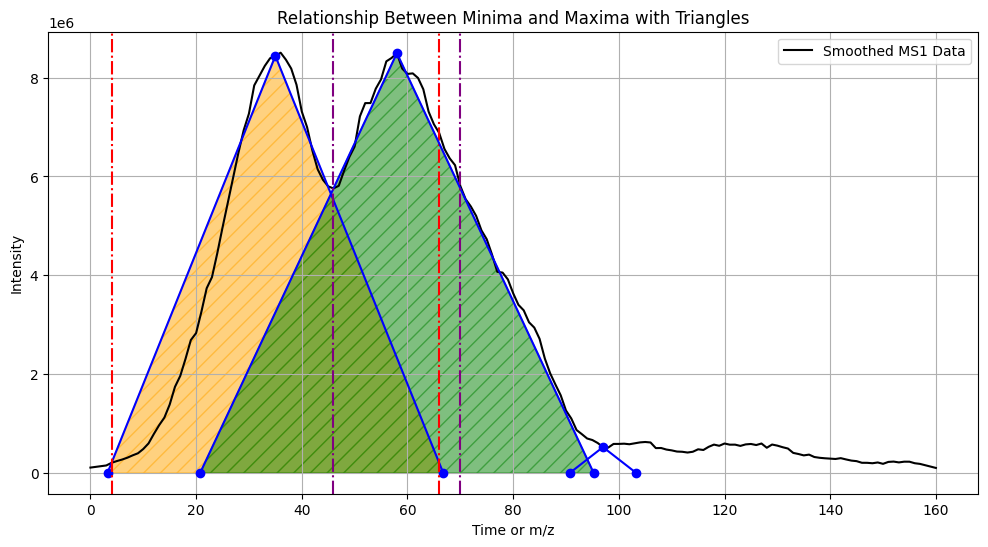

In [23]:
# Plot with predictions of endpoint extensions
plt.figure(figsize=(12, 6))
plt.plot(x, smoothed_mfy, "#000000", label='Smoothed MS1 Data')

for min_idx, max_idx in zip(minima[:3], peaks[:3]):
    try:
        x1, y1 = x[min_idx], smoothed_mfy[min_idx]
        x2, y2 = x[max_idx], smoothed_mfy[max_idx]
        slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else 0
        post_min_idx = np.where(minima == min_idx)[0][0] + 1

        extension_x = x2 + (x2 - x1)
        extension_y = y2 - (y2 - y1)
        x_intersect = x2 - (y2 / slope)
        x_intersect2 = x2 + (-y2 / -slope)
        x_triangle = [x_intersect, x2, x_intersect2]
        y_triangle = [0, y2, 0]
        
        plt.plot(x_triangle, y_triangle, 'bo-')
    except IndexError:
        continue
    
    if min_idx == minima[0]:
        color1 = "orange"
        color2 = "red"
    elif min_idx == minima[1]:
        color1 = "green"
        color2 = "purple"
    else:
        continue

    plt.fill(x_triangle, y_triangle, color=color1, alpha=0.5, hatch="//")
    plt.axvline(x=min_idx, color=color2, linestyle='-.')
    plt.axvline(x=extension_x, color=color2, linestyle='-.')

plt.xlabel('Time or m/z')
plt.ylabel('Intensity')
plt.title('Relationship Between Minima and Maxima with Triangles')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Calculate areas of triangles formed by minima and maxima
for min_idx, max_idx in zip(minima[:2], peaks[:2]):
    try:
        x1, y1 = x[min_idx], smoothed_mfy[min_idx]
        x2, y2 = x[max_idx], smoothed_mfy[max_idx]
    except IndexError:
        continue
    
    A = [x1, y1]
    B = [x2, y2]
    slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else 0
    C = [x2 + (-y2 / -slope), 0]
    area = area_triangle(A, B, C)
    print(f"Triangle {A, B, C}:", area)

Triangle ([4, 200303.281875], [35, 8441989.75], [66.75341397202382, 0]): 261701682.25
Triangle ([46, 5757966.125], [58, 8497913.25], [95.2178565307168, 0]): 101974958.99999994


Area of triangle 1 before cutting off a corner: 845479167732.7336
The new point at x=46 is [46, 5757966.125]


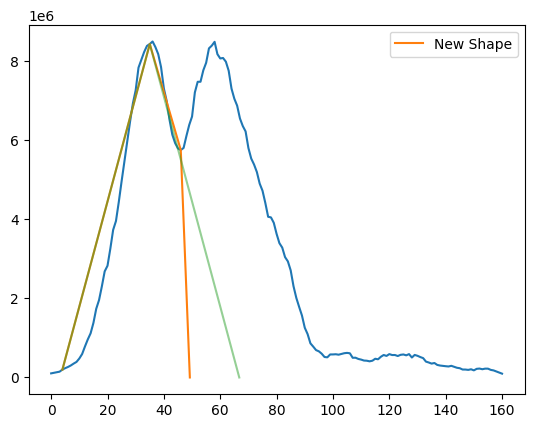

The area of the quadrilateral is: 216790811.22482342 square units
Area of original: 845479167732.7336
Difference: 845262376921.5088
199.8974615834286 %


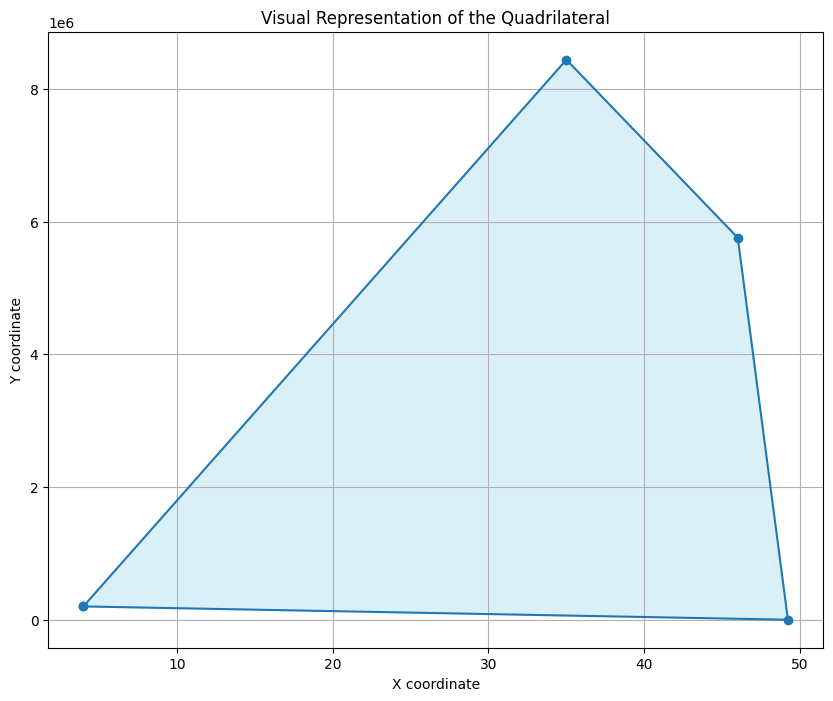

Area of triangle 1 before cutting off a corner: 24465348314238.105


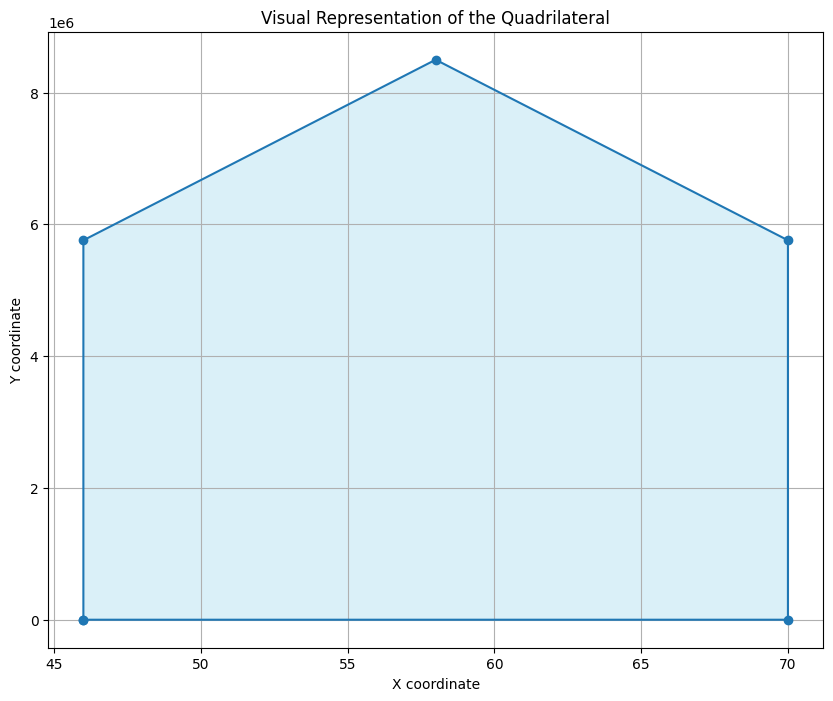

The area of the quadrilateral is: 171070552.5 square units
Area of original: 24465348314238.105
Difference: 24465177243685.605
199.99720307507377 %


In [25]:
# Define a function to calculate the area of a triangle
def area_triangle(A, B, C):
    base = distance_between_points(A, C)
    h = B[1]
    area = 0.5 * base * h
    return area

# Calculate area of triangles with new points
min_idx1, max_idx1 = minima[0], peaks[0]
x1, y1 = x[min_idx1], smoothed_mfy[min_idx1]
x2, y2 = x[max_idx1], smoothed_mfy[max_idx1]
A1 = [x1, y1]
B1 = [x2, y2]
slope1 = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else 0
C1 = [x2 + (-y2 / -slope1), 0]
area_t1 = area_triangle(A1, B1, C1)
print("Area of triangle 1 before cutting off a corner:", area_t1)
lower_limit = x1
upper_limit = x[minima[1]]
C_new = [C[0] - upper_limit, C[1]]

# Function to find the slope of a line
def find_slope(x1, y1, x2, y2):
    return (y2 - y1) / (x2 - x1)

# Function to find a point on a line
def point_on_line(x1, y1, x2, y2, x_new):
    m = find_slope(x1, y1, x2, y2)
    y_new = m * (x_new - x1) + y1
    return [x_new, y_new]

x_new = upper_limit
new_point = point_on_line(x2, y2, 46, smoothed_mfy[46], x_new)
print(f"The new point at x={x_new} is {new_point}")

corners = [(A1), (B1), (new_point), (C_new)]

plt.plot(smoothed_mfy)
plt.plot([A1[0], B1[0], new_point[0], C_new[0]], [A1[1], B1[1], new_point[1], C_new[1]], label="New Shape")
plt.plot([A1[0], B1[0], C1[0]], [A1[1], B1[1], C1[1]], alpha=0.5)
plt.legend()
plt.show()

# Function to calculate the area of a quadrilateral using the shoelace theorem
def calculate_area_quadrilateral(corners):
    n = len(corners)
    area = 0
    for i in range(n):
        j = (i + 1) % n
        x_i, y_i = corners[i]
        x_j, y_j = corners[j]
        area += x_i * y_j - y_i * x_j
    return abs(area) / 2

area_new_1 = calculate_area_quadrilateral(corners)
print(f"The area of the quadrilateral is: {area_new_1} square units")
print(f"Area of original: {area_t1}")
print("Difference:", area_t1 - area_new_1)
percentage_difference = (abs(area_t1 - area_new_1) / ((area_t1 + area_new_1) / 2)) * 100
print(percentage_difference, "%")

# Function to plot the quadrilateral
def plot_polygon(corners):
    corners.append(corners[0])
    x, y = zip(*corners)
    plt.figure(figsize=(10, 8))
    plt.plot(x, y, marker='o')
    plt.fill(x, y, 'skyblue', alpha=0.3)
    plt.title('Visual Representation of the Quadrilateral')
    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")
    plt.grid(True)
    plt.show()

# Plot the quadrilateral
plot_polygon(corners.copy())

# Calculate area of the second triangle with new points
min_idx2, max_idx2 = minima[1], peaks[1]
x1, y1 = x[min_idx2], smoothed_mfy[min_idx2]
x2, y2 = x[max_idx2], smoothed_mfy[max_idx2]
A2 = [x1, y1]
B2 = [x2, y2]
slope2 = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else 0
C2 = [x2 + (-y2 / -slope2), 0]

x_intersect2 = x2 + (-y2 / -slope)
extension_2 = [x_intersect2, 0]

area_t2 = area_triangle(A2, B2, C2)
print("Area of triangle 1 before cutting off a corner:", area_t2)
lower_limit_2 = x1
upper_limit_2 = x_intersect2
C_new = [C[0] - upper_limit, C[1]]

new_point_2 = [x2 + (x2 - x1), y2 - (y2 - y1)]
A2_0x = [A2[0], 0]
corners_2 = [A2_0x, A2, B2, new_point_2, [new_point_2[0], 0]]
plot_polygon(corners_2)

area_new_2 = calculate_area_quadrilateral(corners_2)
print(f"The area of the quadrilateral is: {area_new_2} square units")
print(f"Area of original: {area_t2}")
print("Difference:", area_t2 - area_new_2)
percentage_difference_2 = (abs(area_t2 - area_new_2) / ((area_t2 + area_new_2) / 2)) * 100
print(percentage_difference_2, "%")